# Cómo construir un dataset para detectar fake news

## Antecedentes

// TODO: poner un parrafo corto explicativo de lo que se va a realizar.


## Los datos

| Columna    |  Tipo de dato | Descripción   |
|------------|---------------|---------------|
| `titulo`   | string | Titulo de la noticia | 
| `texto`    | string | Contenido de la noticia | 
| `fuente`   | string | De donde fue tomada la noticia | 
| `usuario`  | string | usuario que publicó la noticia | 
| `fecha`    | date | Fecha | 
| `medio`    | string | Medio de comunicación donde se público la noticia | 
| `clasificación`   | string | Titulo de la noticia | 
| `tipologia_8P`   | string | Titulo de la noticia | 
| `link`     | string | Enlace donde se encuentra la noticia original | 
| `link_verificador`   | string | Enlace del medio verificador que corroboró o desmintio la noticia | 
| `tipo_noticia`   | string | Tipo de noticia | 
| `audiovisual`    | boolean | Si la noticia posee un archivo audiovisual adjunto | 
| `fake_news` | boolean | Si la noticia es clasificada como falsa o verdadera | 


In [ ]:
import pandas as pd

fake_news = pd.read_csv("./fake_news.csv", error_bad_lines=False, delimiter=";")
fake_news.head()

,titulo,texto,fuente,usuario,fecha,medio,clasificacion,tipologia_8P,link,link_verificador,tipo_noticia,fake_news,audiovisual
0,SE FUGO!!! el hijo del narco presidente NO APA...,“suspenden indefinidamente rueda de prensa del...,Anónima,No Mas Comunismo,12-mar-23,Facebook,Política,"Partidismo, Provocación",https://www.facebook.com/photo/?fbid=749966093...,https://colombiacheck.com/chequeos/no-nicolas-...,Contenido engañoso,False,True
1,NP,"""Todos los campesinos mugrosos resentidos de C...",Suplantada,CarlArthurKing,4-mar-23,Twitter,Política,Parodia,https://twitter.com/carlarthurking/status/1631...,https://colombiacheck.com/chequeos/cita-en-que...,"Sátira, contenido impostor",False,True
2,NP,¿Saben porque no se expanden los paneles solar...,Oficial,Gustavo Petro,4-mar-23,Twitter,Ambiental,Pasión,https://twitter.com/petrogustavo/status/163220...,https://colombiacheck.com/chequeos/es-falso-qu...,Contexto falso,False,False
3,NP,"El mismo gobierno les avisa, desde la cuenta o...",Identificada,FRANKPORTILLA,19-feb-23,Twitter,Política,"Partidismo, Pasión",https://twitter.com/PETRIIISTAAAAS/status/1627...,https://colombiacheck.com/chequeos/yerbateros-...,Conexión falsa,False,True
4,NP,Me está comentado una amiga que trabaja en Adu...,Identificada,Liliana Aristizabal,23-feb-23,Facebook,Social,Provecho,https://www.facebook.com/liliana.aristizabal.5...,https://colombiacheck.com/chequeos/de-nuevo-es...,Contenido fabricado,False,False


## Probando la calidad del dataset
Basandose en la [Guía para evaluar calidad de datos basada en ISO/IEC 25012](https://core.ac.uk/download/pdf/301104068.pdf) se puede comprobar la calidad del dataset construido. En la normativa ISO/IEC 25012




// TODO: agregar sección entera de como se va implementar la guia para probar la calidad de los datos en el dataset

## Conociendo el dataset

// TODO: usar EDA para conocer mejor el dataset

<AxesSubplot:xlabel='audiovisual', ylabel='count'>

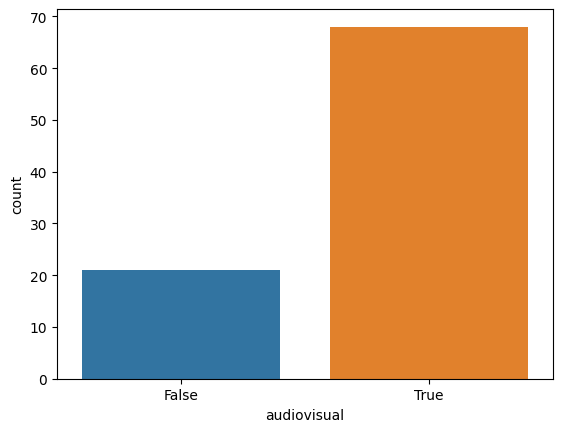

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=fake_news, x="audiovisual")

<AxesSubplot:xlabel='fake_news', ylabel='count'>

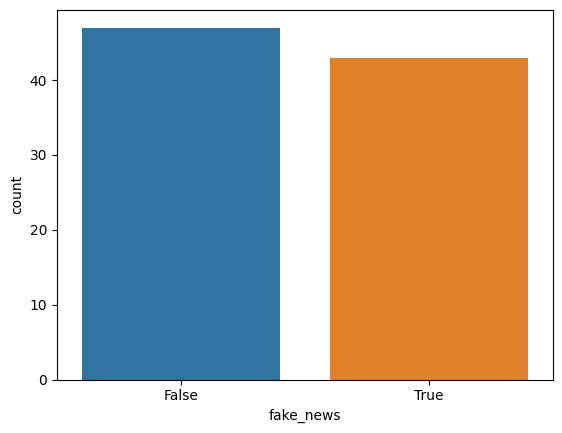

In [ ]:
sns.countplot(data=fake_news, x="fake_news")

In [ ]:
amount_fake_images = fake_news[fake_news["fake_news"] == False]
len(amount_fake_images)
# fake_news.shape

47

## Entrenamiento de un modelo básico

// TODO: agregar un modelo de entrenamiento de ML para probar que el dataset funciona

In [ ]:
# Import the necessary modules
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# fake_news = pd.read_csv("./fake_news.csv", error_bad_lines=False, delimiter=";")
eng_fake_news = pd.read_csv("./fake_or_real_news.csv")

eng_fake_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
esp_fake_news = pd.read_csv("./fakes1000.csv")
esp_fake_news.head()

,class,Text
0,True,Algunas de las voces extremistas más conocida...
1,True,Después de casi dos años y medio de luchas po...
2,True,Dos periodistas birmanos de la agencia Reuter...
3,True,El Cuerpo Nacional de Policía ha detenido a c...
4,True,El desfile de la firma en Roma se convierte e...


In [ ]:
# Create a series to store the labels: y
y_eng = eng_fake_news.label

# Create a series to store the labels: y
y_esp_1 = fake_news['fake_news'].apply(lambda x: "FAKE" if x is False else "REAL")
y_esp_2 = esp_fake_news['class'].apply(lambda x: "FAKE" if x is False else "REAL")



In [ ]:
# y = pd.concat([y_eng, y_esp])
y = pd.concat([y_esp_1, y_esp_2])
# X = pd.concat([eng_fake_news["text"],fake_news["texto"]])
X = pd.concat([fake_news["texto"], esp_fake_news["Text"]])
print(X)


0       “suspenden indefinidamente rueda de prensa del...
1       "Todos los campesinos mugrosos resentidos de C...
2       ¿Saben porque no se expanden los paneles solar...
3       El mismo gobierno les avisa, desde la cuenta o...
4       Me está comentado una amiga que trabaja en Adu...
                              ...                        
1995     El Consejo de Gobierno ha dado su visto bueno...
1996     Investigadores valencianos han desarrollado u...
1997     Los arrestados actuaban en coches y en establ...
1998     El Rey ha encargado este miércoles a Pedro Sá...
1999     Las pruebas realizadas en el Centro Nacional ...
Length: 2090, dtype: object


In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

import nltk
nltk.download('stopwords')

stopword_es = nltk.corpus.stopwords.words('spanish')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words=stopword_es)

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])



# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred,labels=["FAKE","REAL"])
# cm = metrics.confusion_matrix(y_test, pred)
print(cm)

['00' '000' '007' '01' '02' '028' '05' '050016099166202158121' '069' '07']
0.7913043478260869
[[258  59]
 [ 85 288]]


In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stopword_es, max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred,labels=["FAKE","REAL"])
print(cm)


['00' '000' '007' '01' '02' '028' '05' '050016099166202158121' '069' '07']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.7855072463768116
[[270  47]
 [101 272]]


In [ ]:
pred = nb_classifier.predict(tfidf_train[0])
print(pred)
print(pred.shape)
print(type(pred))

['REAL']
(1,)
<class 'numpy.ndarray'>


## Evaluación del modelo

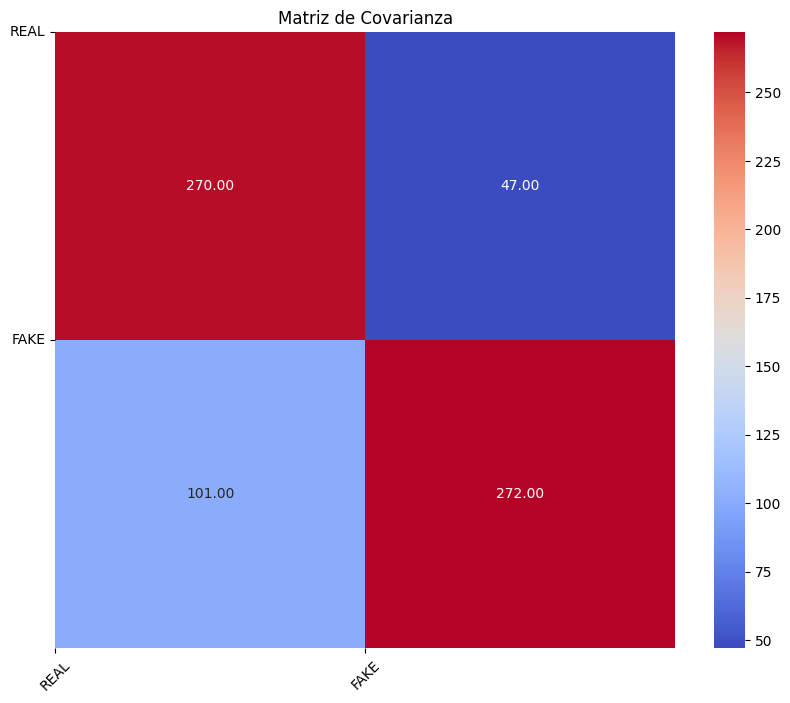

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Covarianza")
column_names = ["REAL", "FAKE"]
plt.xticks(range(len(column_names)), column_names, rotation=45, ha="center")
plt.yticks(range(len(column_names)), column_names, rotation=0, va="center")
plt.show()

In [ ]:
# Texto que deseas predecir
# texto = "suspenden indefinidamente rueda de prensa del delincuente Nicolás Petro porque se voló"
texto = "Este jueves hubo un importante avance en el caso de sicariato ocurrido en la noche de halloween, cuando un hombre identificado como Jéferson González fue asesinado en plena calle residencial del municipio de Soacha, aledaño al sur de Bogotá, mientras llevaba de la mano a su pequeña hija de tres años. La Policía Metropolitana de Soacha confirmó en horas de la mañana de este 2 de noviembre que había capturado al presunto autor material del homicidio. También se conocieron otros detalles sobre los aparentes móviles del crimen y la persona que estaría detrás de este."

# Aplica el mismo TfidfVectorizer al texto
tfidf_text = tfidf_vectorizer.transform([texto])

# Realiza la predicción con el modelo Multinomial Naive Bayes
prediccion = nb_classifier.predict(tfidf_text)

# Imprime la predicción
if prediccion[0] == "FAKE":
    print("La noticia es falsa.")
else:
    print("La noticia es verdadera.")


La noticia es verdadera.


In [ ]:
from joblib import dump, load


def save_model(model, path="./model.pkl") -> None:
    dump(model, path)

# save_model(nb_classifier)
# save_model(count_vectorizer,"./count_vectorizer.pkl")

In [ ]:
# texto = "Este jueves hubo un importante avance en el caso de sicariato ocurrido en la noche de halloween, cuando un hombre identificado como Jéferson González fue asesinado en plena calle residencial del municipio de Soacha, aledaño al sur de Bogotá, mientras llevaba de la mano a su pequeña hija de tres años. La Policía Metropolitana de Soacha confirmó en horas de la mañana de este 2 de noviembre que había capturado al presunto autor material del homicidio. También se conocieron otros detalles sobre los aparentes móviles del crimen y la persona que estaría detrás de este."
texto = """El fallo se filtró a los medios de comunicación luego de la sesión privada del órgano electoral, quien venía analizando la posible inhabilidad del político, toda vez, que estuvo haciendo campaña a un candidato a la Gobernación que no está avalado por la colectividad que a él lo apoya. En una decisión sin precedentes, el candidato a la alcaldía de Santa Marta, Carlos Pinedo Cuello, ha sido revocado de su inscripción por el Consejo Nacional Electoral (CNE). La revocación se fundamenta en la presunta doble militancia del candidato, la cual quedó evidenciada con posterioridad a su inscripción. La solicitud de revocatoria de la inscripción fue presentada por un grupo de ciudadanos de Santa Marta bajo la acusación de que Carlos Pinedo Cuello incurrió en doble militancia al inscribirse por el grupo significativo de ciudadanos "Santa Marta 'Si Puede'" y ser coavalado por el partido político Cambio Radical."""

clf = load("./model.pkl")
count_vect = load("./count_vectorizer.pkl")

text_converted = count_vect.transform([texto])
clf.predict(text_converted)

array(['REAL'], dtype='<U4')

In [ ]:
def convert_text_to_vector(value):
    # Initialize a CountVectorizer object: count_vectorizer
    count_vectorizer = CountVectorizer(stop_words="words")
    return count_vectorizer.transform(value)

# print(type(fake_news))
# print(fake_news.head())
print(fake_news.iloc[0,1])
text_converted = convert_text_to_vector([fake_news.iloc[0,1]])
print(type(text_converted))

print(text_converted)

“suspenden indefinidamente rueda de prensa del delincuente  Nicolás Petro porque se voló”


NotFittedError: Vocabulary not fitted or provided

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=712f5fc8-fd6e-40b9-85fd-ce87073a2d1d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>